In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df=pd.read_csv("C:/Users/Lenovo/Desktop/mymoviedb.csv")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:

df.fillna({
           'Title':'null', 
           'Overview': 'null' ,
           'Popularity': 0.0,
           'Vote_Count':0,
           'Vote_Average':0.0,
           'Original_Language':'null',
           'Genre':'null',
           'Poster_Url':'null'}, inplace=True)

df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9837 non-null   object 
 2   Overview           9837 non-null   object 
 3   Popularity         9837 non-null   float64
 4   Vote_Count         9837 non-null   object 
 5   Vote_Average       9837 non-null   object 
 6   Original_Language  9837 non-null   object 
 7   Genre              9837 non-null   object 
 8   Poster_Url         9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [190]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').fillna(0).astype(int)
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce').fillna(0.0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  object  
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  float64 
 5   Genre         25551 non-null  category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 1023.9+ KB


In [161]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [192]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,0.0,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,0.0,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,0.0,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,0.0,Crime
4,01-03-2022,The Batman,3827.658,1151,0.0,Mystery


In [163]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [164]:
df.head(20)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,6.3,Thriller
3,24-11-2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
5,07-01-2022,The Commando,1750.484,33,6.6,"Action, Crime, Thriller"
6,12-01-2022,Scream,1675.161,821,6.8,"Horror, Mystery, Thriller"
7,10-02-2022,Kimi,1601.782,206,6.3,Thriller
8,17-02-2022,Fistful of Vengeance,1594.013,114,5.3,"Action, Crime, Fantasy"
9,03-11-2021,Eternals,1537.406,4726,7.2,Science Fiction


In [165]:
# categorizing Vot_Average column

# we could cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using 
# catigorize_col() function provided above.

def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],
    df[col].describe()['75%'],
    df[col].describe()['max']]  
    
    df[col]= pd.cut(df[col],edges, labels=labels, duplicates= 'drop')
    return df 

In [166]:
labels=['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df,'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [167]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,below_avg,Thriller
3,24-11-2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [168]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [169]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [170]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,below_avg,Thriller
3,24-11-2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [171]:
# we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,popular,Crime
4,01-03-2022,The Batman,3827.658,1151,popular,Mystery


In [172]:
# casting column into category

df['Genre']=df['Genre'].astype('category')  
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  object  
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 849.4+ KB


In [174]:
df.nunique()

Release_Date    5845
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [175]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,popular,Crime
4,01-03-2022,The Batman,3827.658,1151,popular,Mystery


In [176]:
# Data Visualization

sns.set_style('whitegrid')

In [ ]:
# what is the most frequent genre of movies released on Netflix?

df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

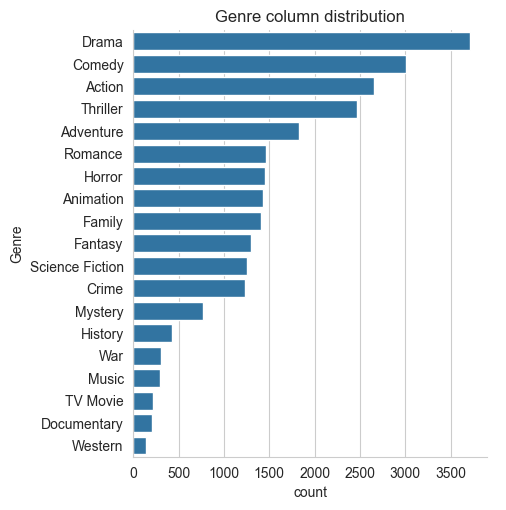

In [178]:
sns.catplot(y='Genre', data=df, kind='count',order= df['Genre'].value_counts().index)
plt.title('Genre column distribution')
plt.show()

In [179]:
# which has highest votes in vote avg column?
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,popular,Crime
4,01-03-2022,The Batman,3827.658,1151,popular,Mystery


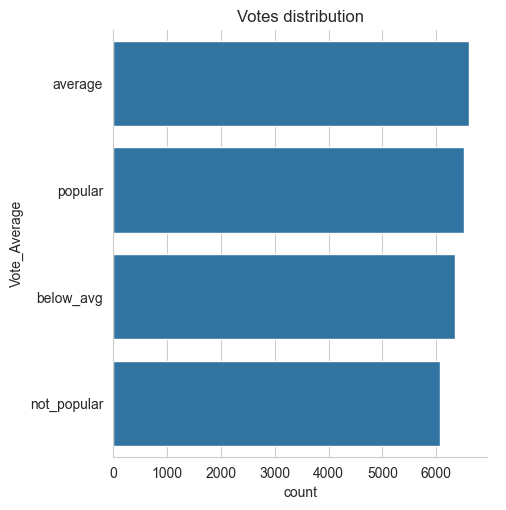

In [180]:
sns.catplot(y='Vote_Average', data=df, kind='count', order= df['Vote_Average'].value_counts().index)
plt.title('Votes distribution')
plt.show()

In [181]:
# What movie got the highest popularity? what's its genre?

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,popular,Crime
4,01-03-2022,The Batman,3827.658,1151,popular,Mystery


In [182]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [183]:
# what movie got the lowest popularity? what's its genre?

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,popular,Crime
4,01-03-2022,The Batman,3827.658,1151,popular,Mystery


In [184]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,31-03-2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,31-03-2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,31-03-2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,23-09-1984,Threads,13.354,186,popular,War
25549,23-09-1984,Threads,13.354,186,popular,Drama
25550,23-09-1984,Threads,13.354,186,popular,Science Fiction


In [197]:
# which year has the most filmmed movies?

df['Release_Date'] = pd.to_datetime(df['Release_Date'], dayfirst=True, errors='coerce')

df['Release_Year'] = df['Release_Date'].dt.year

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,0.0,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,0.0,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,0.0,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,0.0,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,0.0,Mystery,2022


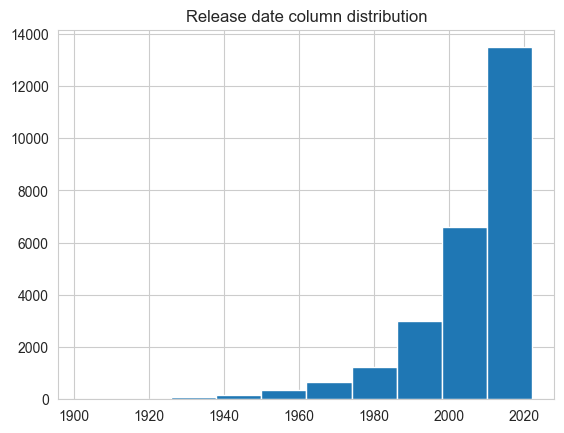

In [196]:
df['Release_Year'].hist()
plt.title('Release date column distribution')
plt.show()

In [ ]:
# CONCLUSION

#Q1: What is the most frequent genre of movies released on Netflix ?
#Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

#Q2: Which has highest votes in vote avg column ?
#we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% 
#of movies popularities.

#Q3: What movie got the highest popularity ? what's its genre ?
#Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Adventure and Sience Fiction.

#Q3: What movie got the lowest popularity ? what's its genre ?
#The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history`.

#Q4: Which year has the most filmmed movies?
#year 2020 has the highest filmming rate in our dataset.